<h1><center>Introduction to linear and logistic regression </center></h1>

<img src="https://zupimages.net/up/18/42/h04k.png" height="200" width="200"/>

Ce cours est réalisé dans le cadre de la formation proprosée par l'I.A Lab

<h2><center> Sommaire </center></h2>

<p> <b>1.1 Introduction</b> </p>
<p> <b>2.0 Régression linéaire</b></p>
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Théorie</p>
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Application</p>
<p> <b>3.0 Régression logistique</b></p>
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1 Théorie</p>
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2 Application</p>

<h2><center> Introduction </center></h2>

### Intelligence artificielle,machine and deep learning...?
<img src="https://zupimages.net/up/18/42/66s1.png" height=500 width=500/>

<b>Intelligence artificielle </b><br>
<i>L'Intelligence Artificielle (IA) est la science dont le but est de faire faire par une machine des
tâches que l'homme accomplit en utilisant son intelligence.</i>-Introduction à L'IA, NormalSup<br>
<b>Machine learning</b><br>
Technique utilisée par L'I.A, capacité d'un ordinateur à apprendre y avoir été préalablement programmé.<br>
<b>Deep learning</b><br>
Technique basée sur les réseaux de neuronnes qui prends son intérêt lorsque l'on dispose de jeux de données conséquents et d'une forte puissance de calcul (GPU). Contrairement au machine learning, l'on a pas besoins de spécifiés les attributs des entrées (images, videos,etc), il sont extrait de de façon automatique via le réseaux de neurones qui apprend( en ajustant ses poids) à l'aide un mécanisme appellé rétropropagation(Backpropagation).



### Le choix du modèle: 
<img src="Ressources/ia_map.png" height=500 width=500/>

<b>Apprentissage supervisé:</b>  utilisation d'un ensemble de données étiquetés.<br>
<b>Apprentissage non supervisé:</b> utilisation d'un ensemble de points fournis à un algorithme qui va tenter de trouver une structure entre eux.<br>
<b>Apprentissage par renforcement:</b> le but est de l'algorithme est d'apprendre les actions et décisions à prendre à partir d'experience passées dans le but de maximiser la récompense finale.


<i>« La majeure partie de l’apprentissage effectué par les humains et les animaux n’est pas supervisée. Si l’intelligence était un gâteau, l’apprentissage non supervisé serait le gâteau, l’apprentissage supervisé serait le glaçage et l’apprentissage par renforcement serait la cerise sur le gâteau. Nous savons comment faire le glaçage et la cerise, mais nous ne savons pas comment faire le gâteau », a-t-il écrit sur son profil. Et il ne s’agit-là que d’un des défis que doit surmonter la communauté des scientifiques.

«  Nous devons résoudre le problème de l’apprentissage non supervisé avant même de penser à obtenir une vraie intelligence artificielle. Et c’est juste un obstacle que nous connaissons. Que dire de tous ceux que nous ne connaissons pas ? »<i> - Yann Le Cun


## Régression linéaire

<b> Définition </b><br>
Problème de régression à plusieurs variables ayant pour objectif pour de calculer l'équation qui réprésente au mieu le lien entre ces variables. On peut distinguer deux types de variables : la cible (ou target) que l'on veut approcher, puis attributs que l'on va utiliser pour construire ce modèl.<br>

Peut-on prédire la masse du cerveau d'un individu en connaissant le volume de son cerveau.

<b>A partir d’une valeur donnée continue ou discrète (l’attribut) nous allons chercher à déduire une valeur continue (la cible).</b>

<b>En d’autre termes, quelle relation peut-on trouver entre le volume crânien d’un individu et la masse de son cerveau?</b>

<img src="https://zupimages.net/up/18/42/nxhh.png"/>

Comment traduire tout cela mathématiquement? Comment trouver la valeur de ces variables?
Pour ce faire on peut utiliser la <b> méthode des moindres carrés </b>
$$ y=b_0+b_1x $$


$$ b_1=\frac{\sum_{n=1}^{N} (X_i-\bar{x})(Y_i-\bar{y})}{\sum_{n=1}^{N}(X_i-\bar{x})^2}$$

$$ b_0=\bar{y}-b_1\bar{x} $$

<b> Il est important de noter que dans ce cas nous avons utilisé un modèle à une seule variable d'entrée, mais il est tout à fait possible de l'étendre afin d'utiliser plusieurs attributs pour réaliser une prédiction. Dans ce cas nous n'utiliserions pas des variables simples mais des matrices qui pourraient se traduire sous cette forme </b>
$$ y=b_0+WX $$
avec $ X=\begin{bmatrix} x_1 \ x_2 \ ... \ x_n \end{bmatrix} $ le vecteur d'attribut et $ W=\begin{bmatrix} w_1 \\ w_2 \\ ... \\ w_n\end{bmatrix}$ la matrice de poids.

In [21]:
# On commence par importer les librairies dont nous auront besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

In [22]:
data=pd.read_csv("headbrain.csv") # on importe le data set
data.head() # affichage du dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


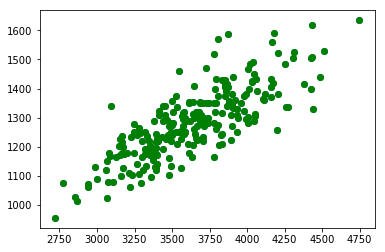

In [6]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values
plt.plot(X,Y,'go')
plt.show()

In [7]:
Xmean=np.mean(X)
Ymean=np.mean(Y)
B1UpSum=0
B1DownSum=0
for i in range(X.size):
    B1UpSum+=(X[i]-Xmean)*(Y[i]-Ymean)
    B1DownSum+=(X[i]-Xmean)**2
    
B1=B1UpSum/B1DownSum
B0=Ymean-B1*Xmean

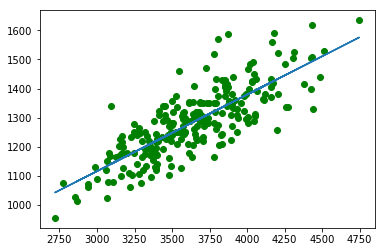

In [8]:
Line=B0+B1*X
plt.plot(X,Y,'go')
plt.plot(X,Line)
plt.show()

In [8]:
def y(x):
    return B0+B1*x

Ypredicted=y(X)
error=(abs(Ypredicted-Y))/Y*100

data["Predicted"]=Ypredicted
data["Error%"]=error
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Predicted,Error%
0,1,1,4512,1530,1514.166601,1.034863
1,1,1,3738,1297,1310.272292,1.023307
2,1,1,4261,1335,1448.045837,8.467853
3,1,1,3777,1282,1320.546036,3.006711
4,1,1,4177,1590,1425.917772,10.319637


On remarque que le taux d'erreur est acceptable mais pas parfait. Dans la prochaine partie nous allons nous intéresser au deuxième type de problème : la classification.<br>

Pour approfondir

 <center><h2> Régression logistique</center></h2>

## Définition
Algorithme ayant pour but de prédire une valeurs de sortie dîte catégorique qui dépend directement d'autres variables numériques. 


## Le problème

Contrairement à la regression linéaire dont le but est de prédire des valeurs continues ici on cherche à réaliser une <b> classification binaire. </b>
Le but est de développer un algorithme qui aura pour but de détecter si une transaction est frauduleuse ou non. Pour cela, nous allons l'entraîner à l'aide d'un jeu de données que l'on présentera plus bas. A partir de celui-ci notre algorithme va 

## Le jeu de donnée

Nous allons utiliser un jeu de données provenant du site Kaggle. Celui-ci comporte plus de 6 millions d'entrées sur des transactions passées et catalogué comment étant ou non frauduleuses ( 0 ou 1). Cependant celui-ci est inutilisable dans l'état actuel et nécessite quelques étapes de traîtements que nous allons décrire ici.

## Traitement du jeu de donnée

<img src="https://zupimages.net/up/18/42/xrnm.png" /><br>
<b>Exemples d'outils de preprocessing</b><br>
- Matrice de corrélation
- PCA ( Analyse de composantes principales)

<b>Qu'est-ce qu'un modèle?</b><br>
Fonction complexe possédant un ensemble de paramètres ayant pour but d'approcher une solution réelle.<br>

<b>Validation de l'erreur</b><br>
- Quantification de l'erreur
- Approfondir


## Fonctionnement

La regression linéaire découle  de la regression simple. La façon dont nous obtenons une valeur souhaité de 0 ou de 1 est que l'on ajoute à <b>la regression linéaire</b> traîtée précedement une <b>fonction logistique </b> dans laquelle on <b>remplace la variable par une formule de régression classique</b>.

La définition de cette <b> fonction logistique </b> est:

$$ y_{predicted}=\frac{1}{1+e^{-(b_0+b_1*x_1+b_2*x_2+...+b_n*x_n)}}=\frac{1}{2}(1+tanh(1+x)) $$

avec $ b_0,b_1,b_2,...b_n $ les biais qui sont les coefficients que nous allons chercher à définir par la suite.


Ces paramètres ne sont pas choisis aléatoirement, on peut les déduire en utilisant une méthode appelée <b>Stochastic gradient descent</b>, elle est définie par:

$$ b_i=b_i+\alpha x_i y_{predicted}(y_{expected}-y_{predicted})(1-y_{predicted}) $$

avec $ \alpha $ le taux d'apprentissage ( ou learning rate) qui dépends des problèmes. On peut définir $ \alpha=0.01$ comme valeur par défaut ( ce cours étant une introduction nous ne rentrerons pas dans les détails de la façon d'obtenir ce taux).

En pratique nous n'allons pas recoder tout cela à la main car ce serait assez complexe pour un cours d'introduction. Nous allons à la place utiliser une bibliothèque appelée <b>sklearn</b> conçue pour résoudre ce genre de problème.  



In [2]:
#https://www.kaggle.com/ntnu-testimon/paysim1
df = pd.read_csv("fraud_ds.csv")
df.head()
df.shape

(6362620, 11)

In [3]:
df_isfraud = df.loc[df['isFraud'] == 1]
df_isnotfraud = df.loc[df['isFraud'] == 0]

df_isnotfraud = df_isnotfraud.iloc[0:50000,:]

df = pd.concat([df_isfraud,df_isnotfraud],axis=0)

from sklearn.utils import shuffle
df = shuffle(df)

X = df.drop(['isFlaggedFraud','isFraud'],axis=1)
Y = df["isFraud"]

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
27368,8,PAYMENT,15546.80,C1941800559,38629.00,23082.20,M435448221,0.0,0.00,0,0
5914952,404,TRANSFER,10000000.00,C2023224715,12754759.04,2754759.04,C1730830963,0.0,0.00,1,0
39471,9,PAYMENT,25445.84,C1760388322,165432.54,139986.70,M1055218341,0.0,0.00,0,0
9804,7,CASH_IN,6288.28,C1015829779,6517609.49,6523897.77,C771404135,21351.0,15062.72,0,0
37978,9,PAYMENT,3632.44,C1855452714,25247.00,21614.56,M1623620251,0.0,0.00,0,0


In [8]:
#One hot encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X.iloc[:, 1] = labelencoder_X_1.fit_transform(X.iloc[:, 1])
X.iloc[:, 3] = labelencoder_X_1.fit_transform(X.iloc[:, 3])
X.iloc[:, 6] = labelencoder_X_1.fit_transform(X.iloc[:, 6])
print(X)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)


         step  type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
27368       8     3     15546.80     28317       38629.00        23082.20   
5914952   404     4  10000000.00     30761    12754759.04      2754759.04   
39471       9     3     25445.84     22797      165432.54       139986.70   
9804        7     0      6288.28       475     6517609.49      6523897.77   
37978       9     3      3632.44     25732       25247.00        21614.56   
47043       9     3     17571.35     51499           0.00            0.00   
266         1     3      2946.38     46815           0.00            0.00   
2074482   182     4   1486052.97     31476     1486052.97            0.00   
30600       8     4   1321660.45     28642     1423731.22       102070.77   
12692       7     3       190.48     29920     5797624.73      5797434.25   
5779        6     0     91867.60      6506     3752880.98      3844748.58   
5962969   406     1    183385.35     37331      183385.35            0.00   

In [9]:
#Séparation en 3 échantillons

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.2)

In [10]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)


In [11]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
clf.score(X_test, y_test)

0.90691432252523085

In [13]:
def predictvalue(df,val):
    valtest = df[val]
    valtest = np.expand_dims(valtest, axis=0)
    
    return clf.predict(valtest)


In [14]:
predictvalue(X,4)

array([0], dtype=int64)

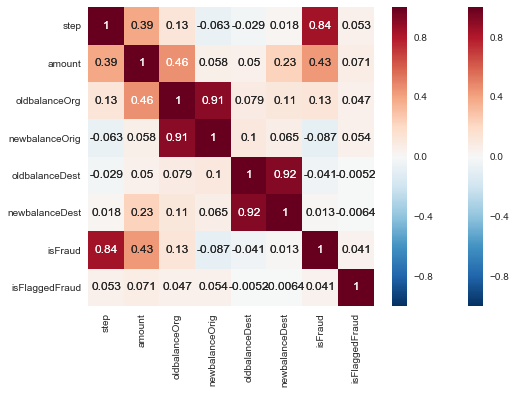

In [20]:
corr_matrix = df.corr()

import seaborn as sns; sns.set()
sns.heatmap(corr_matrix,annot=True)
sns.plt.show()

# Conclusion